In [4]:
from src.MO_DQN import MO_DQN
import mo_gymnasium as mo_gym
from src.gridsearch import gridsearch
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting

### Configure and run the experiments

In [6]:
#experiment configurations
env_config_1 = {
        "observation": {
            "type": "MultiAgentObservation",
            "observation_config": {
                "type": "OccupancyGrid",
                "vehicles_count": 15,
                "features": ["presence", "x", "y", "vx", "vy"],
                "features_range": {
                    "x": [-100, 100],
                    "y": [-100, 100],
                    "vx": [-20, 20],
                    "vy": [-20, 20]
                },
                "grid_size": [[-27.5, 27.5], [0, +12]],
                "grid_step": [5, 4],
            }
        }
    }

env_config_2 = {
        "collision_reward": 0,
        "observation": {
            "type": "MultiAgentObservation",
            "observation_config": {
                "type": "OccupancyGrid",
                "vehicles_count": 15,
                "features": ["presence", "x", "y", "vx", "vy"],
                "features_range": {
                    "x": [-100, 100],
                    "y": [-100, 100],
                    "vx": [-20, 20],
                    "vy": [-20, 20]
                },
                "grid_size": [[-27.5, 27.5], [-27.5, 27.5]],
                "grid_step": [5, 5],
            }
        }
    }

run_config = {
    "env": [env_config_1, env_config_2],
    "init": {
         "gamma": [0.9],
         "replay_buffer_size": [1000],
         "use_reward_normalisation_wrapper": [False],
         "use_default_reward_normalisation": [True]
    },
    "train": {
         "num_iterations" : 150_000,
         "inv_target_update_frequency": 20,
         "epsilon_start": 0.9,
         "epsilon_end": 0
    },
    "eval": {
        "num_repetitions": 20,
        "num_points": 30,
        "hv_reference_point": np.ndarray([0,0]),
        "episode_recording_interval": None,
        "render_episodes": False
    },
}

In [7]:
#run the experiments
env = mo_gym.make('mo-highway-env-v0', render_mode='rgb_array')
gridsearch(MO_DQN, env, run_config, 11, csv_file_path="data/crash_reward_adjustments/")


Weight tuple: 100%|██████████| 30/30 [12:16<00:00, 24.56s/it]



Weight tuple: 100%|██████████| 30/30 [11:47<00:00, 23.59s/it]




### Data preprocessing

In [8]:
#load the data
df_complete = pd.read_csv("data/crash_reward_adjustments/experiment_merged.csv")
display(df_complete.info())
display(df_complete)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        1200 non-null   int64  
 1   repetition_number                 1200 non-null   int64  
 2   weight_index                      1200 non-null   int64  
 3   weight_tuple                      1200 non-null   object 
 4   num_iterations                    1200 non-null   int64  
 5   normalised_speed_reward           1200 non-null   float64
 6   normalised_energy_reward          1200 non-null   float64
 7   raw_speed_reward                  1200 non-null   float64
 8   raw_energy_reward                 1200 non-null   float64
 9   env_config_id                     1200 non-null   int64  
 10  gamma                             1200 non-null   float64
 11  replay_buffer_size                1200 non-null   int64  
 12  use_re

None

,Unnamed: 0,repetition_number,weight_index,weight_tuple,num_iterations,normalised_speed_reward,normalised_energy_reward,raw_speed_reward,raw_energy_reward,env_config_id,gamma,replay_buffer_size,use_reward_normalisation_wrapper,use_default_reward_normalisation
0,0,0,0,"[0.0, 1.0]",80,0.111172,0.943538,8.893732,75.483031,0,0.9,1000,False,True
1,1,1,0,"[0.0, 1.0]",80,0.104922,0.937288,8.393732,74.983031,0,0.9,1000,False,True
2,2,2,0,"[0.0, 1.0]",80,0.167457,0.999788,13.396524,79.983031,0,0.9,1000,False,True
3,3,3,0,"[0.0, 1.0]",80,0.115661,0.941117,9.252880,75.289341,0,0.9,1000,False,True
4,4,4,0,"[0.0, 1.0]",80,0.166056,0.998399,13.284451,79.871920,0,0.9,1000,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,595,15,29,"[1.0, 0.0]",80,0.956646,0.609265,76.531651,48.741187,1,0.9,1000,False,True
1196,596,16,29,"[1.0, 0.0]",80,0.946082,0.598848,75.686541,47.907853,1,0.9,1000,False,True
1197,597,17,29,"[1.0, 0.0]",13,0.857927,0.519853,11.153045,6.758095,1,0.9,1000,False,True
1198,598,18,29,"[1.0, 0.0]",3,0.534857,0.217319,1.604571,0.651957,1,0.9,1000,False,True


In [12]:
#preprocess the dataframe
multi_index_list = ["env_config_id"]
value_list = ['normalised_speed_reward', 'normalised_energy_reward']
table = pd.pivot_table(df_complete, values=value_list, index=multi_index_list,
                        columns=['weight_index'], aggfunc="mean")
table = table.reset_index()
table['experiment_index'] = table.index
display(table)

env_config_id normalised_energy_reward                      \
weight_index                                      0         1         2   
0                        0                 0.977897  0.982275  0.997326   
1                        1                 0.991580  0.989721  0.988148   

                                                                          ...  \
weight_index         3         4         5         6         7         8  ...   
0             0.989307  0.993755  0.985547  0.994680  0.990527  0.984605  ...   
1             0.987938  0.978805  0.989609  0.976886  0.987026  0.981628  ...   

             normalised_speed_reward                                          \
weight_index                      21        22        23        24        25   
0                           0.801009  0.855693  0.845407  0.847917  0.814132   
1                           0.854757  0.849905  0.816488  0.851725  0.835610   

                                                     experiment_index  
weight_index        26        27        28        29                   
0             0.791687  0.830974  0.854241  0.803358                0  
1             0.855315  0.877877  0.828950  0.858780                1  

[2 rows x 62 columns]

In [13]:
multi_index_list = ['env_config_id', "weight_index"]

grouped_df = df_complete.groupby(multi_index_list)[value_list].mean()
index = grouped_df.index
grouped_df = grouped_df.reset_index()
grouped_df.set_index(index, inplace=True)
multi_index_list.remove("weight_index")
grouped_df["experiment"] = grouped_df[multi_index_list].apply(tuple, axis=1)
display(grouped_df.info())
display(grouped_df)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 60 entries, (0, 0) to (1, 29)
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   env_config_id             60 non-null     int64  
 1   weight_index              60 non-null     int64  
 2   normalised_speed_reward   60 non-null     float64
 3   normalised_energy_reward  60 non-null     float64
 4   experiment                60 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB


None

env_config_id  weight_index  \
env_config_id weight_index                                
0             0                         0             0   
              1                         0             1   
              2                         0             2   
              3                         0             3   
              4                         0             4   
              5                         0             5   
              6                         0             6   
              7                         0             7   
              8                         0             8   
              9                         0             9   
              10                        0            10   
              11                        0            11   
              12                        0            12   
              13                        0            13   
              14                        0            14   
              15                        0            15   
              16                        0            16   
              17                        0            17   
              18                        0            18   
              19                        0            19   
              20                        0            20   
              21                        0            21   
              22                        0            22   
              23                        0            23   
              24                        0            24   
              25                        0            25   
              26                        0            26   
              27                        0            27   
              28                        0            28   
              29                        0            29   
1             0                         1             0   
              1                         1             1   
              2                         1             2   
              3                         1             3   
              4                         1             4   
              5                         1             5   
              6                         1             6   
              7                         1             7   
              8                         1             8   
              9                         1             9   
              10                        1            10   
              11                        1            11   
              12                        1            12   
              13                        1            13   
              14                        1            14   
              15                        1            15   
              16                        1            16   
              17                        1            17   
              18                        1            18   
              19                        1            19   
              20                        1            20   
              21                        1            21   
              22                        1            22   
              23                        1            23   
              24                        1            24   
              25                        1            25   
              26                        1            26   
              27                        1            27   
              28                        1            28   
              29                        1            29   

                            normalised_speed_reward  normalised_energy_reward  \
env_config_id weight_index                                                      
0             0                            0.146582                  0.977897   
              1                            0.153037                  0.982275   
              2                            0.

In [14]:
nds = NonDominatedSorting()
value_columns = ["normalised_speed_reward", "normalised_energy_reward"]
#add pareto information
grouped_df["pareto"] = False
experiment_indices = grouped_df["experiment"].unique()
for index in experiment_indices:
    #get data of a specific experiment
    data = grouped_df[grouped_df["experiment"] == index]
    #compute the indices containing non-dominated points
    pareto_indices = nds.do(data[value_columns], only_non_dominated_front=True)
    #set pareto flag to True at the corresponding indices of the entire dataframe
    grouped_df.loc[(grouped_df["experiment"] == index) & (data["weight_index"].isin(pareto_indices)),"pareto"] = True


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False



<Axes: xlabel='normalised_speed_reward', ylabel='normalised_energy_reward'>

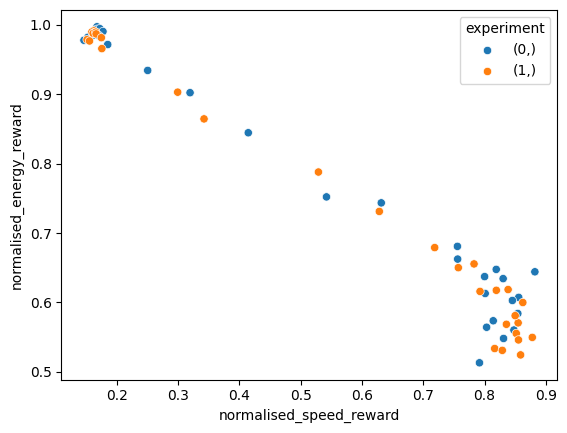

In [15]:
#plot all points
import seaborn as sns
sns.scatterplot(data=grouped_df, x='normalised_speed_reward', y='normalised_energy_reward', hue="experiment")

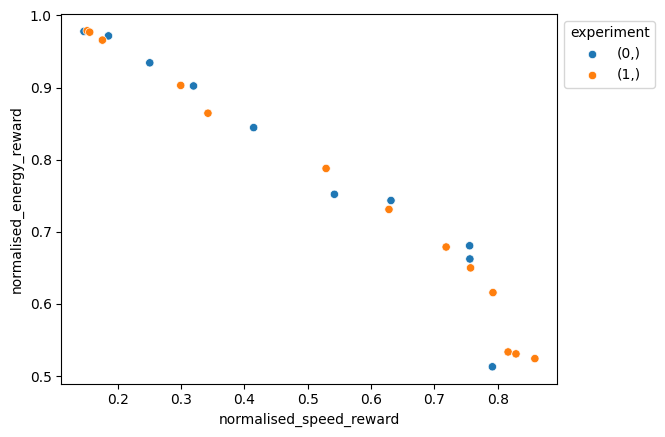

In [16]:
#plot only non-dominated points
ax = sns.scatterplot(data=grouped_df[grouped_df["pareto"]==True], x='normalised_speed_reward', y='normalised_energy_reward', hue="experiment")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [17]:
# num iterations
multi_index_list = ['env_config_id', "weight_index"]
value_list = ["num_iterations"]
grouped_df = df_complete.groupby(multi_index_list)[value_list].mean()
index = grouped_df.index
grouped_df = grouped_df.reset_index()
grouped_df.set_index(index, inplace=True)
multi_index_list.remove("weight_index")
grouped_df["experiment"] = grouped_df[multi_index_list].apply(tuple, axis=1)

env_config_id  weight_index
0              0               80.00
               1               80.00
               2               80.00
               3               80.00
               4               80.00
               5               80.00
               6               80.00
               7               80.00
               8               80.00
               9               80.00
               10              80.00
               11              77.75
               12              75.10
               13              68.95
               14              74.20
               15              67.40
               16              65.35
               17              67.65
               18              67.55
               19              58.95
               20              72.25
               21              69.50
               22              61.75
               23              57.55
               24              56.15
               25              49.75
          

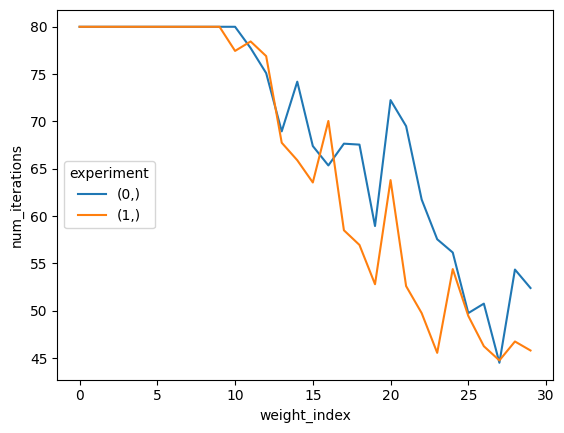

In [27]:
ax = sns.lineplot(grouped_df, x="weight_index", y="num_iterations", hue="experiment")
sns.move_legend(ax, "center left")

df_complete.groupby(["env_config_id", "weight_index"])["num_iterations"].mean()

experiment_id 0 --> collision reward -1
experiment_id 1 --> collision reward 0
--> collision reward of -1 works better.